In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve


In [ ]:
# Importing data
from google.colab import files
uploaded=files.upload()

Saving Titanic_train.csv to Titanic_train.csv


In [ ]:
df1=pd.read_csv('Titanic_train.csv')

In [ ]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Titanic_test.csv to Titanic_test.csv


In [ ]:
df2=pd.read_csv('Titanic_test.csv')

In [ ]:
df2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
# Concatination
df=pd.concat([df1,df2],axis=0)

In [ ]:
df['Survived'].fillna(0,inplace=True)
df['Survived']=df['Survived'].astype(int)

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,0,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
# Basic Analysis
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(1309, 12)

In [ ]:
df.size

15708

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.261268,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.439494,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
df['Survived'].value_counts()

Survived
0    967
1    342
Name: count, dtype: int64

In [ ]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [ ]:
df.duplicated().sum()

0

<Axes: >

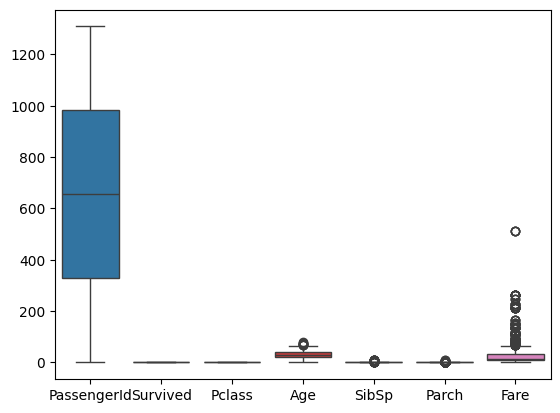

In [ ]:
# Visualizations
sns.boxplot(df)

array([[<Axes: title={'center': 'Survived'}>]], dtype=object)

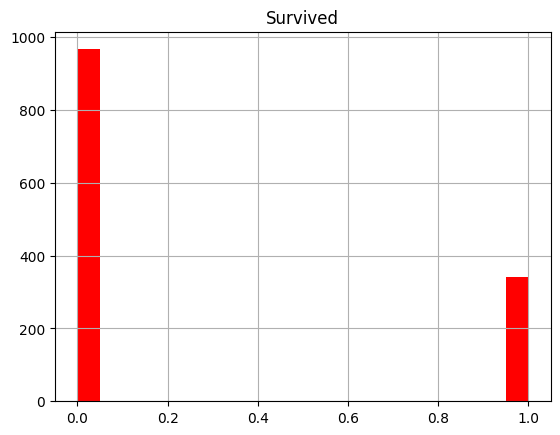

In [ ]:
df.hist(['Survived','Sex'],bins=20,color='red')

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

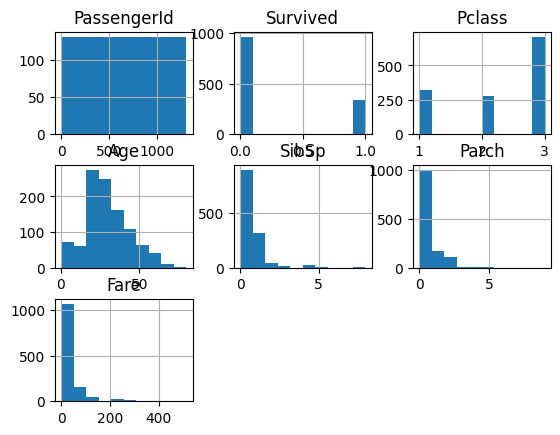

In [ ]:
df.hist()

<Axes: >

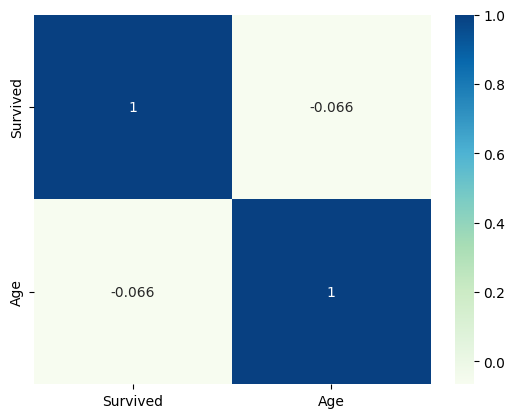

In [ ]:
sns.heatmap(df[['Survived','Age']].corr(),annot=True,cmap='GnBu')

<Axes: xlabel='Survived', ylabel='count'>

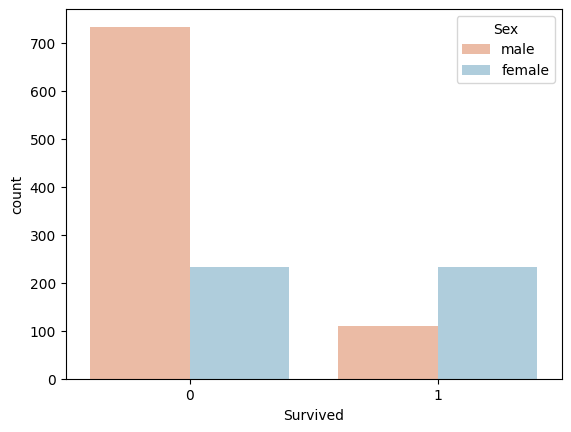

In [ ]:
sns.countplot(x='Survived',data=df,palette='RdBu',hue='Sex')

In [ ]:
df.Pclass.value_counts()

Pclass
3    709
1    323
2    277
Name: count, dtype: int64

In [ ]:
df.Sex.value_counts()

Sex
male      843
female    466
Name: count, dtype: int64

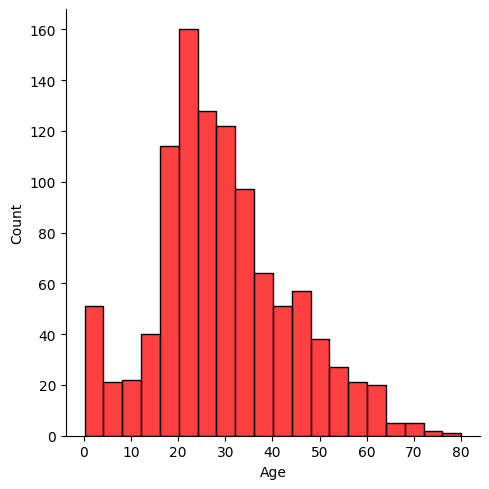

In [ ]:
sns.displot(df['Age'].dropna(),kde=False,bins=20,color='red')

In [ ]:
df['Age'].skew()

0.40767455974362266

In [ ]:
df.drop('Name',axis=1,inplace=True)

In [ ]:
df.drop('Ticket',axis=1,inplace=True)

In [ ]:
df.drop('Cabin',axis=1,inplace=True)

In [ ]:
df.drop('Fare',axis=1,inplace=True)

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Embarked'],
      dtype='object')

In [ ]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...,...
413,1305,0,3,male,NaN,0,0,S
414,1306,0,1,female,39.0,0,0,C
415,1307,0,3,male,38.5,0,0,S
416,1308,0,3,male,NaN,0,0,S


In [ ]:
lab_enc=LabelEncoder()

In [ ]:
df['Sex']=lab_enc.fit_transform(df['Sex'])

In [ ]:
df['Embarked']=lab_enc.fit_transform(df['Embarked'])

In [ ]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,1,22.0,1,0,2
1,2,1,1,0,38.0,1,0,0
2,3,1,3,0,26.0,0,0,2
3,4,1,1,0,35.0,1,0,2
4,5,0,3,1,35.0,0,0,2
...,...,...,...,...,...,...,...,...
413,1305,0,3,1,NaN,0,0,2
414,1306,0,1,0,39.0,0,0,0
415,1307,0,3,1,38.5,0,0,2
416,1308,0,3,1,NaN,0,0,2


In [ ]:
target=df[['Survived']]
target

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
413,0
414,0
415,0
416,0


In [ ]:
features=df.drop('Survived',axis=1)
features

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,3,1,22.0,1,0,2
1,2,1,0,38.0,1,0,0
2,3,3,0,26.0,0,0,2
3,4,1,0,35.0,1,0,2
4,5,3,1,35.0,0,0,2
...,...,...,...,...,...,...,...
413,1305,3,1,NaN,0,0,2
414,1306,1,0,39.0,0,0,0
415,1307,3,1,38.5,0,0,2
416,1308,3,1,NaN,0,0,2


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=100)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1047, 7)
(262, 7)
(1047, 1)
(262, 1)


In [ ]:
sim_impute=SimpleImputer(missing_values=np.nan,strategy='median')

In [ ]:
x_train=sim_impute.fit_transform(x_train)
x_test=sim_impute.fit_transform(x_test)

In [ ]:
pd.DataFrame(x_test).isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64

In [ ]:
y_train= pd.DataFrame(y_train)
y_test= pd.DataFrame(y_test)
y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)



In [ ]:
sim_impute=SimpleImputer(missing_values=np.nan,strategy='median')

In [ ]:
y_train= sim_impute.fit_transform(y_train)
y_test= sim_impute.fit_transform(y_test)

In [ ]:
log_model=LogisticRegression()

In [ ]:
log_model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred=log_model.predict(x_test)

In [ ]:
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1.

In [ ]:
df.Survived.value_counts()

Survived
0    967
1    342
Name: count, dtype: int64

In [ ]:
log_model.predict_proba(x_test)

array([[0.76360085, 0.23639915],
       [0.9659339 , 0.0340661 ],
       [0.97907362, 0.02092638],
       [0.96307959, 0.03692041],
       [0.65935526, 0.34064474],
       [0.50730484, 0.49269516],
       [0.95115844, 0.04884156],
       [0.79539465, 0.20460535],
       [0.83132564, 0.16867436],
       [0.13720605, 0.86279395],
       [0.58909357, 0.41090643],
       [0.93891342, 0.06108658],
       [0.55652196, 0.44347804],
       [0.7232026 , 0.2767974 ],
       [0.71254379, 0.28745621],
       [0.46464728, 0.53535272],
       [0.97698379, 0.02301621],
       [0.9890459 , 0.0109541 ],
       [0.85718599, 0.14281401],
       [0.85808335, 0.14191665],
       [0.28070583, 0.71929417],
       [0.86107044, 0.13892956],
       [0.91177155, 0.08822845],
       [0.56081962, 0.43918038],
       [0.2751676 , 0.7248324 ],
       [0.98880461, 0.01119539],
       [0.90082383, 0.09917617],
       [0.95756326, 0.04243674],
       [0.84587577, 0.15412423],
       [0.98904279, 0.01095721],
       [0.

In [ ]:
log_model.coef_

array([[-0.0029988 , -0.94863736, -2.07523519, -0.02929431, -0.40570228,
         0.03368932, -0.11620004]])

In [ ]:
log_model.intercept_

array([5.11799549])

In [ ]:
accuracy_score(y_test,y_pred)

0.8587786259541985

<Axes: >

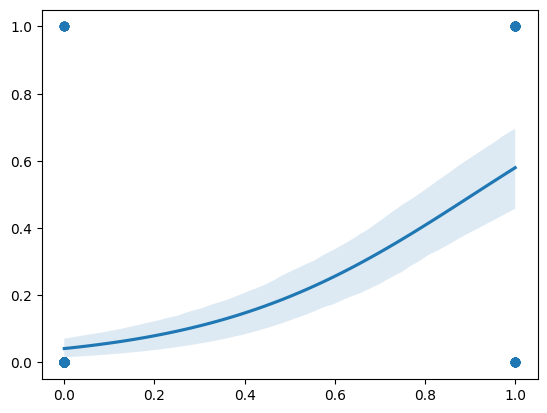

In [ ]:
sns.regplot(data=df,x=y_test,y=y_pred,logistic=True)

In [ ]:
y_pred_new=[1 if x[1]>0.4 else 0 for x in log_model.predict_proba(x_test)]

In [ ]:
y_pred_new1=[0 if x[0]>0.6 else 1 for x in log_model.predict_proba(x_test)]

In [ ]:
log_model.predict_proba(x_test)

array([[0.76360085, 0.23639915],
       [0.9659339 , 0.0340661 ],
       [0.97907362, 0.02092638],
       [0.96307959, 0.03692041],
       [0.65935526, 0.34064474],
       [0.50730484, 0.49269516],
       [0.95115844, 0.04884156],
       [0.79539465, 0.20460535],
       [0.83132564, 0.16867436],
       [0.13720605, 0.86279395],
       [0.58909357, 0.41090643],
       [0.93891342, 0.06108658],
       [0.55652196, 0.44347804],
       [0.7232026 , 0.2767974 ],
       [0.71254379, 0.28745621],
       [0.46464728, 0.53535272],
       [0.97698379, 0.02301621],
       [0.9890459 , 0.0109541 ],
       [0.85718599, 0.14281401],
       [0.85808335, 0.14191665],
       [0.28070583, 0.71929417],
       [0.86107044, 0.13892956],
       [0.91177155, 0.08822845],
       [0.56081962, 0.43918038],
       [0.2751676 , 0.7248324 ],
       [0.98880461, 0.01119539],
       [0.90082383, 0.09917617],
       [0.95756326, 0.04243674],
       [0.84587577, 0.15412423],
       [0.98904279, 0.01095721],
       [0.

In [ ]:
confusion_matrix(y_test,y_pred)

array([[185,   8],
       [ 29,  40]])

Text(0.5, 1.0, 'Confusion_Matrix')

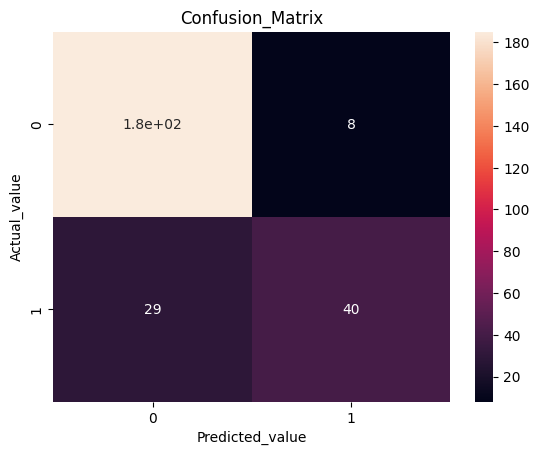

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,color='Green')
plt.xlabel('Predicted_value')
plt.ylabel('Actual_value')
plt.title('Confusion_Matrix')

In [ ]:
y_test_series=pd.Series(y_test.ravel())
value_counts=y_test_series.value_counts()
print(value_counts)

0.0    193
1.0     69
Name: count, dtype: int64


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91       193
         1.0       0.83      0.58      0.68        69

    accuracy                           0.86       262
   macro avg       0.85      0.77      0.80       262
weighted avg       0.86      0.86      0.85       262



In [ ]:
confusion_matrix(y_test,y_pred)

array([[185,   8],
       [ 29,  40]])

In [ ]:
roc_auc_score(y_test,y_pred)

0.7691296838627317

In [ ]:
log_proba=log_model.predict_proba(x_test)[::,1]
log_proba

array([0.23639915, 0.0340661 , 0.02092638, 0.03692041, 0.34064474,
       0.49269516, 0.04884156, 0.20460535, 0.16867436, 0.86279395,
       0.41090643, 0.06108658, 0.44347804, 0.2767974 , 0.28745621,
       0.53535272, 0.02301621, 0.0109541 , 0.14281401, 0.14191665,
       0.71929417, 0.13892956, 0.08822845, 0.43918038, 0.7248324 ,
       0.01119539, 0.09917617, 0.04243674, 0.15412423, 0.01095721,
       0.03456143, 0.121608  , 0.04693528, 0.58185927, 0.19969664,
       0.30174522, 0.02626107, 0.06397558, 0.23548339, 0.01095815,
       0.28176094, 0.23571502, 0.68516407, 0.70225218, 0.3065452 ,
       0.01263136, 0.81228104, 0.00711362, 0.63999904, 0.21179504,
       0.25634818, 0.03808042, 0.03054067, 0.9444231 , 0.53250258,
       0.04983148, 0.3815412 , 0.12150621, 0.11547937, 0.7768967 ,
       0.09990381, 0.41831818, 0.03161961, 0.08375887, 0.35252548,
       0.20707921, 0.03853069, 0.07693532, 0.2527299 , 0.91787651,
       0.69622549, 0.00692881, 0.13004801, 0.20333354, 0.02282

In [ ]:
auc_score=roc_auc_score(y_test,log_proba)
auc_score

0.8722685289479613

In [ ]:
roc_curve(y_test,log_proba)

(array([0.        , 0.        , 0.        , 0.00518135, 0.00518135,
        0.01036269, 0.01036269, 0.01554404, 0.01554404, 0.02072539,
        0.02072539, 0.02590674, 0.02590674, 0.03626943, 0.03626943,
        0.04145078, 0.04145078, 0.06735751, 0.06735751, 0.08290155,
        0.08290155, 0.10880829, 0.10880829, 0.11917098, 0.11917098,
        0.13989637, 0.13989637, 0.15025907, 0.15025907, 0.16580311,
        0.16580311, 0.22797927, 0.22797927, 0.25388601, 0.25388601,
        0.2642487 , 0.2642487 , 0.26943005, 0.26943005, 0.2746114 ,
        0.2746114 , 0.29533679, 0.29533679, 0.33678756, 0.33678756,
        0.39896373, 0.39896373, 0.40932642, 0.40932642, 0.4611399 ,
        0.4611399 , 0.49222798, 0.49222798, 0.5388601 , 0.5388601 ,
        0.5492228 , 0.5492228 , 0.58031088, 0.58031088, 0.7253886 ,
        0.7253886 , 1.        ]),
 array([0.        , 0.01449275, 0.28985507, 0.28985507, 0.30434783,
        0.30434783, 0.36231884, 0.36231884, 0.47826087, 0.47826087,
        0.5072

In [ ]:
fpr,tpr,thr=roc_curve(y_test,log_proba)

In [ ]:
thr.shape

(62,)

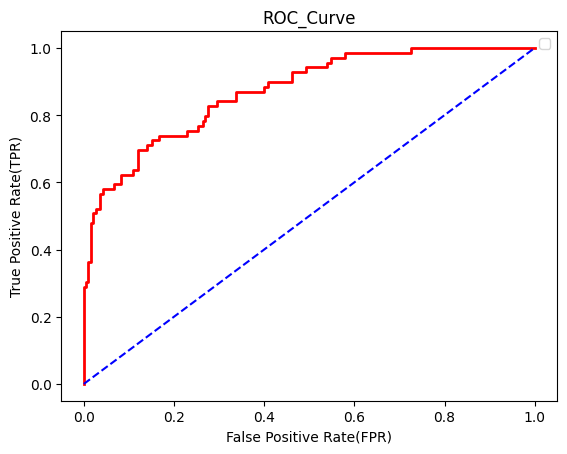

In [ ]:
plt.plot(fpr,tpr,color='red',lw=2,label=f'AUC={auc_score:.2}')
plt.plot([0,1],[0,1],linestyle='--',color='blue')
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC_Curve')
plt.legend('')

In [ ]:
# precision=TP/(TP+FP),precision measures the percentage of predictions made by the model that are correct.
# Recall=TP/(TP+FN),Recall measures the percentage of relevant data points that were correctly identified by the model
# Cross validation  is a technique used to evaluate the performance of a model  on unseen data,to prevent overfitting
# in binary classification each partition contains the same proportions of the two type of class labels.